<a href="https://colab.research.google.com/github/PanTongLin/PanTongLin.github.io/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

## batch to space

In [ ]:
a = torch.Tensor([[[[1], [3]], [[9], [11]]],
          [[[2], [4]], [[10], [12]]],
          [[[5], [7]], [[13], [15]]],
          [[[6], [8]], [[14], [16]]]])
print(a.size())
bs = a.size(0)
hs = a.size(1)
ws = a.size(2)
cs = a.size(3)

In [ ]:
block_s = (2, 2)

In [ ]:
_bs = bs//block_s[1]
_ws = ws*block_s[1]
b = a.reshape((_bs, block_s[1], hs, ws, cs))
b = b.permute(0, 2, 3, 1, 4) #_bs, hs, _ws, block_s[1], cs
b = b.reshape((_bs, hs, _ws, cs))
print(b)

_bs = _bs//block_s[0]
_hs = hs*block_s[0]
b = b.reshape((_bs, block_s[0], hs, _ws, cs))
b = b.permute(0, 2, 1, 3, 4) #_bs, hw, block_s[0], _ws, cs
b = b.reshape((_bs, _hs, _ws, cs))
print(b)

## space to batch

In [ ]:
a = torch.Tensor([[[[1.], [2.], [3.], [4.]],
           [[5.], [6.], [7.], [8.]],
           [[9.], [10.], [11.], [12.]],
           [[13.], [14.], [15.], [16.]]]])
print(a.size())
bs = a.size(0)
hs = a.size(1)
ws = a.size(2)
cs = a.size(3)

In [ ]:
block_s = (2, 2)

In [ ]:
_bs = bs*block_s[0]
_hs = hs//block_s[0]
b = a.reshape((bs, _hs, block_s[0], ws, cs))
b = b.permute(0, 2, 1, 3, 4)
b = b.reshape((_bs, _hs, ws, cs))
print(b)

_ws = ws//block_s[1]
b = b.reshape((_bs, _hs, _ws, block_s[1], cs))
b = b.permute(0, 3, 1, 2, 4)
_bs = _bs*block_s[1]
b = b.reshape((_bs, _hs, _ws, cs))
print(b)

## space to depth

In [ ]:
a = torch.Tensor([[[[1.], [2.], [5.], [6.]],
           [[3.], [4.], [7.], [8.]],
           [[9.], [10.], [13.], [14.]],
           [[11.], [12.], [15.], [16.]]]])
print(a.size())
bs = a.size(0)
hs = a.size(1)
ws = a.size(2)
cs = a.size(3)

torch.Size([1, 4, 4, 1])


In [ ]:
block_s = 2

In [ ]:
_hs = hs//block_s
_ws = ws//block_s
_cs = cs*block_s*block_s
b = a.reshape((bs, _hs, block_s, _ws, block_s, cs))
b = b.permute(0, 1, 3, 2, 4, 5)
b = b.reshape((bs, _hs, _ws, _cs))
print(b)

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.]],

         [[ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])


In [1]:
!sh

sh: 0: can't access tty; job control turned off
sh: 9: shopt: not found
sh: 17: shopt: not found
\[\033\]\w\[\033\]$ ssh s755369@140.113.202.141
00000000


\[\033\]\w\[\033\]$ sh: 2: 00000000: not found
\[\033\]\w\[\033\]$ \[\033\]\w\[\033\]$ 
\[\033\]\w\[\033\]$ 
\[\033\]\w\[\033\]$ ^C


In [1]:
import torch
import matplotlib.pyplot as plt

In [12]:
a = torch.linspace(-10, 10, 1000)
b = torch.nn.functional.relu6(a+3)/6

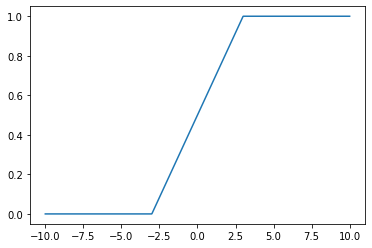

In [13]:
plt.plot(a, b)
plt.show()

(x+3)/6 = x/6 + 0.5

In [5]:
a = torch.Tensor([-2.75])

In [6]:
torch.nn.functional.leaky_relu(a)

tensor([-0.0275])

In [7]:
torch.nn.functional.relu6(a+3)/6

tensor([0.0417])

In [9]:
a = torch.Tensor([-2.5])
torch.nn.functional.hardswish(a)

tensor([-0.2083])

In [3]:
a = torch.randn(1, 4, 5, 5, 5)
w = torch.randn(4, 4, 3, 3, 3)

In [5]:
torch.nn.functional.conv3d(a, w)

tensor([[[[[-12.4344, -11.6190,   5.6177],
           [  1.3536,   2.2060,   3.7965],
           [  1.5861,   4.4353,  -9.3664]],

          [[  4.7155,  -1.9071,  -3.5998],
           [  4.2253,   2.1834,  21.4692],
           [ -4.5008,  -2.8452, -17.4580]],

          [[ 10.4548,  -4.3965,   6.0952],
           [ 12.5653,   2.2464, -12.4085],
           [  1.4456,   4.4300,   5.2494]]],


         [[[-13.3893,  12.2996,  15.9262],
           [ -4.2454,  -6.4254,   5.3520],
           [  2.8088,   5.3971,  -1.9970]],

          [[ 10.8354,  17.2108,  10.8460],
           [ -2.5812,  -7.1705,  -2.2616],
           [  1.2585,  12.3638,   6.9987]],

          [[ -9.9400,  15.8386,   4.6356],
           [  1.8966,  -8.3678,   4.1566],
           [ -2.0304,  -1.5439,  -8.6825]]],


         [[[  8.1853,   6.1762,  -3.0793],
           [  2.8703,   1.2286,   6.2210],
           [  0.8066,   5.2324,  -6.9223]],

          [[  2.0390,   2.4690,  -0.9860],
           [ -7.7627,  17.0593,   5.

In [ ]:
for i in range(5-2):
  for j in range(4):
    _c = torch.nn.functional.conv2d(a[:, j, i:i+3], w[:, j])
    if j==0:
      c = _c
    else:
      c = c + _c
  
  c = c.unsqueeze(dim=2) # N, C, H, W -> N, C, D=1, H, W
  if i==0:
    out = c
  else:
    out = torch.cat([out, c], dim=2)
print(out)

In [ ]:
# a = torch.randn(1, 4, 5, 5, 5) N, C, D, H, W
# w = torch.randn(4, 4, 3, 3, 3) OC, IC, D, H, W

for i in range(5-2):
  c0 = torch.nn.functional.conv2d(a[:, :, i], w[:,:,0])
  c1 = torch.nn.functional.conv2d(a[:, :, i+1], w[:,:,1])
  c2 = torch.nn.functional.conv2d(a[:, :, i+2], w[:,:,2])

  c = c0 + c1 + c2

  c = c.unsqueeze(dim=2) # N, C, H, W -> N, C, D=1, H, W

  if i==0:
    out = c
  else:
    out = torch.cat([out, c], dim=2)
print(out)

In [19]:
(out-torch.nn.functional.conv3d(a, w)).abs()>1e-5

tensor([[[[[False, False, False],
           [False, False, False],
           [False, False, False]],

          [[False, False, False],
           [False, False, False],
           [False, False, False]],

          [[False, False, False],
           [False, False, False],
           [False, False, False]]],


         [[[False, False, False],
           [False, False, False],
           [False, False, False]],

          [[False, False, False],
           [False, False, False],
           [False, False, False]],

          [[False, False, False],
           [False, False, False],
           [False, False, False]]],


         [[[False, False, False],
           [False, False, False],
           [False, False, False]],

          [[False, False, False],
           [False, False, False],
           [False, False, False]],

          [[False, False, False],
           [False, False, False],
           [False, False, False]]],


         [[[False, False, False],
           [False, False